Sunspot Data: https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [2]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

In [3]:
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [4]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 

In [5]:
def print_error(trainY, testY, train_predict, test_predict):    
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    


In [6]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')


In [7]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [8]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
 

2022-03-11 14:47:20.875493: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
187/187 - 1s - loss: 0.0358 - 1s/epoch - 7ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0101 - 500ms/epoch - 3ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0068 - 479ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0056 - 684ms/epoch - 4ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0049 - 554ms/epoch - 3ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0046 - 515ms/epoch - 3ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0045 - 457ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0044 - 481ms/epoch - 3ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0042 - 467ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0042 - 465ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0042 - 451ms/epoch - 2ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0041 - 573ms/epoch - 3ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0042 - 556ms/epoch - 3ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0041 - 442ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0040 - 427ms/epoch - 2ms/step
Epoch 16/20
187/187 - 1s - loss: 0.00

In [9]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
 
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.061 RMSE
Test RMSE: 0.089 RMSE


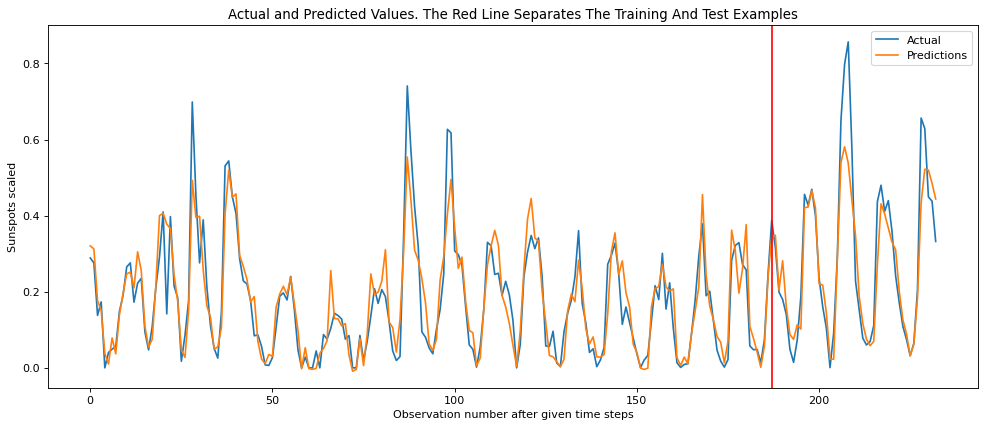

In [10]:
plot_result(trainY, testY, train_predict, test_predict)